## Project Objective

The objectives of the project are:
1.	To know the countries who are generating highest revenue
2.	To know the top customers who are contributing highest to revenue
3.	To know the top selling products
4.	To visualize the trend of the revenue
5.	To segment the customers for knowing the focus area of the company.


## Importing Libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Data...

In [2]:
data = pd.read_csv("/kaggle/input/online-retail-dataset/OnlineRetail (3).csv",encoding= 'unicode_escape')

## Data Description

The available dataset is Online Retail dataset, which have following features:
1.	InvoiceNo – Invoice Number
2.	StockCode – Product ID
3.	Description – Product Description
4.	Quantity – Quantity of the product
5.	InvoiceDate – Date of the Invoice
6.	UnitPrice – Price of the product per unit
7.	CustomerID – Customer ID
8.	Country – Region of Purchase


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.Quantity.sort_values().head()

540422   -80995
61624    -74215
225529    -9600
225530    -9600
4287      -9360
Name: Quantity, dtype: int64

In [7]:
data.UnitPrice.sort_values().head()

299984   -11062.06
299983   -11062.06
40984         0.00
52217         0.00
52262         0.00
Name: UnitPrice, dtype: float64

In [8]:
data['CustomerID'].nunique()

4372

In this dataset, there are some negative values of Quantity and UnitPrice. Also, there are some null values in CustomerID and Description. The number of unique values of CustomerID are 4372. But, the count of null values in CustomerID are 135080, which is a large data, and cannot be imputed by any method, if imputed, there will be a high chance of error. 

In [9]:
new_data = data.copy("deep")
new_data = new_data.dropna()
new_data = new_data[new_data['Quantity']>0]
new_data = new_data[new_data['UnitPrice']>=0]
new_data.shape


(397924, 8)

In [10]:
new_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [12]:
new_data.Country.nunique()

37

## Calculating Revenue

In [13]:
new_data['Revenue'] = new_data['Quantity'] * new_data['UnitPrice']
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
v0 = new_data.groupby('Country').sum().reset_index()
v0.head()

,Country,Quantity,UnitPrice,CustomerID,Revenue
0,Australia,84209,3612.50,14758528.0,138521.31
1,Austria,4881,1693.90,4982601.0,10198.68
2,Bahrain,260,78.95,210027.0,548.40
3,Belgium,23237,7372.85,25246701.0,41196.34
4,Brazil,356,142.60,408608.0,1143.60


In [15]:
import plotly.express as px
figure = px.choropleth(v0,locations="Country",
                       locationmode = "country names", color="Revenue",
                       hover_name="Country",range_color=[1,100000],
                       color_continuous_scale="greens",
                       title="Countries with Highest Revenues")
figure.show()

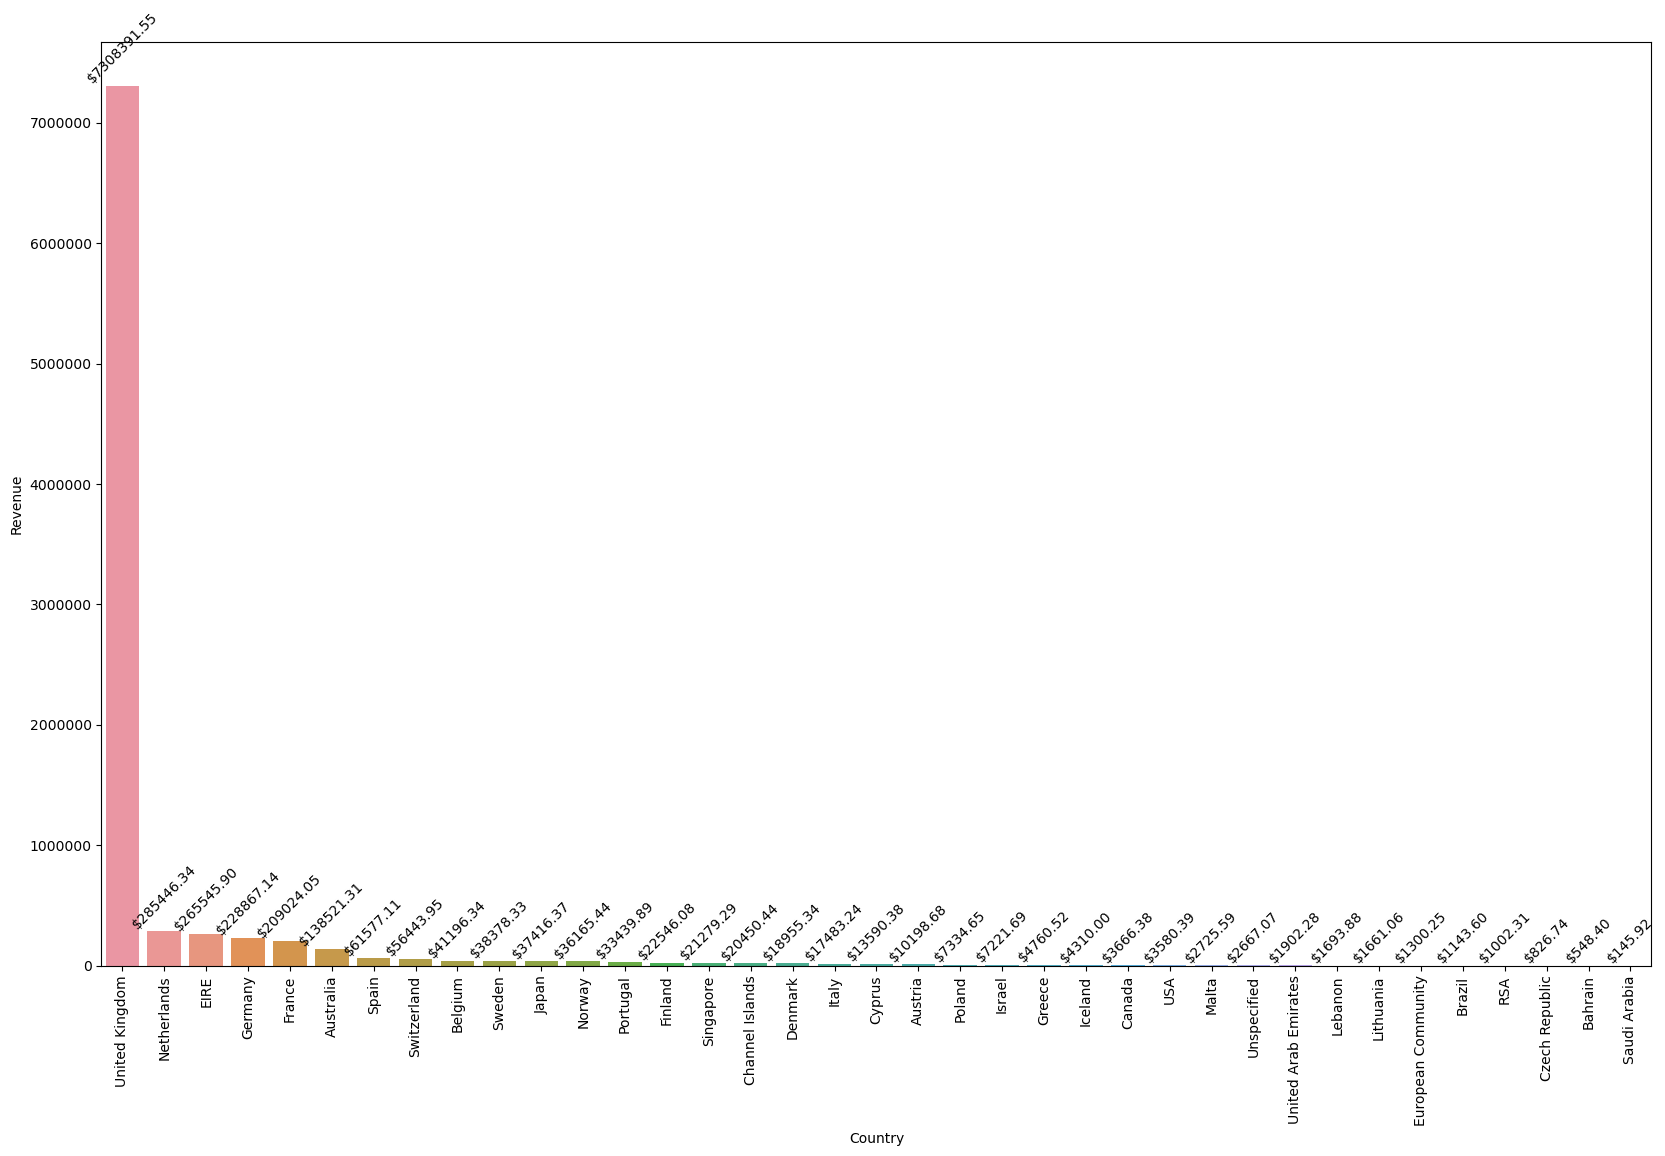

In [16]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v0,x = "Country", y = "Revenue",ci = None, order= v0.sort_values('Revenue',ascending=False).Country)
ax.bar_label(ax.containers[0],rotation = 45,fmt='$%.2f')
plt.xticks(rotation = 90)
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

United Kingdom is the highest revenue generator with total revenue $7,308,391.55.

##  Top 10 countries who generated highest revenue

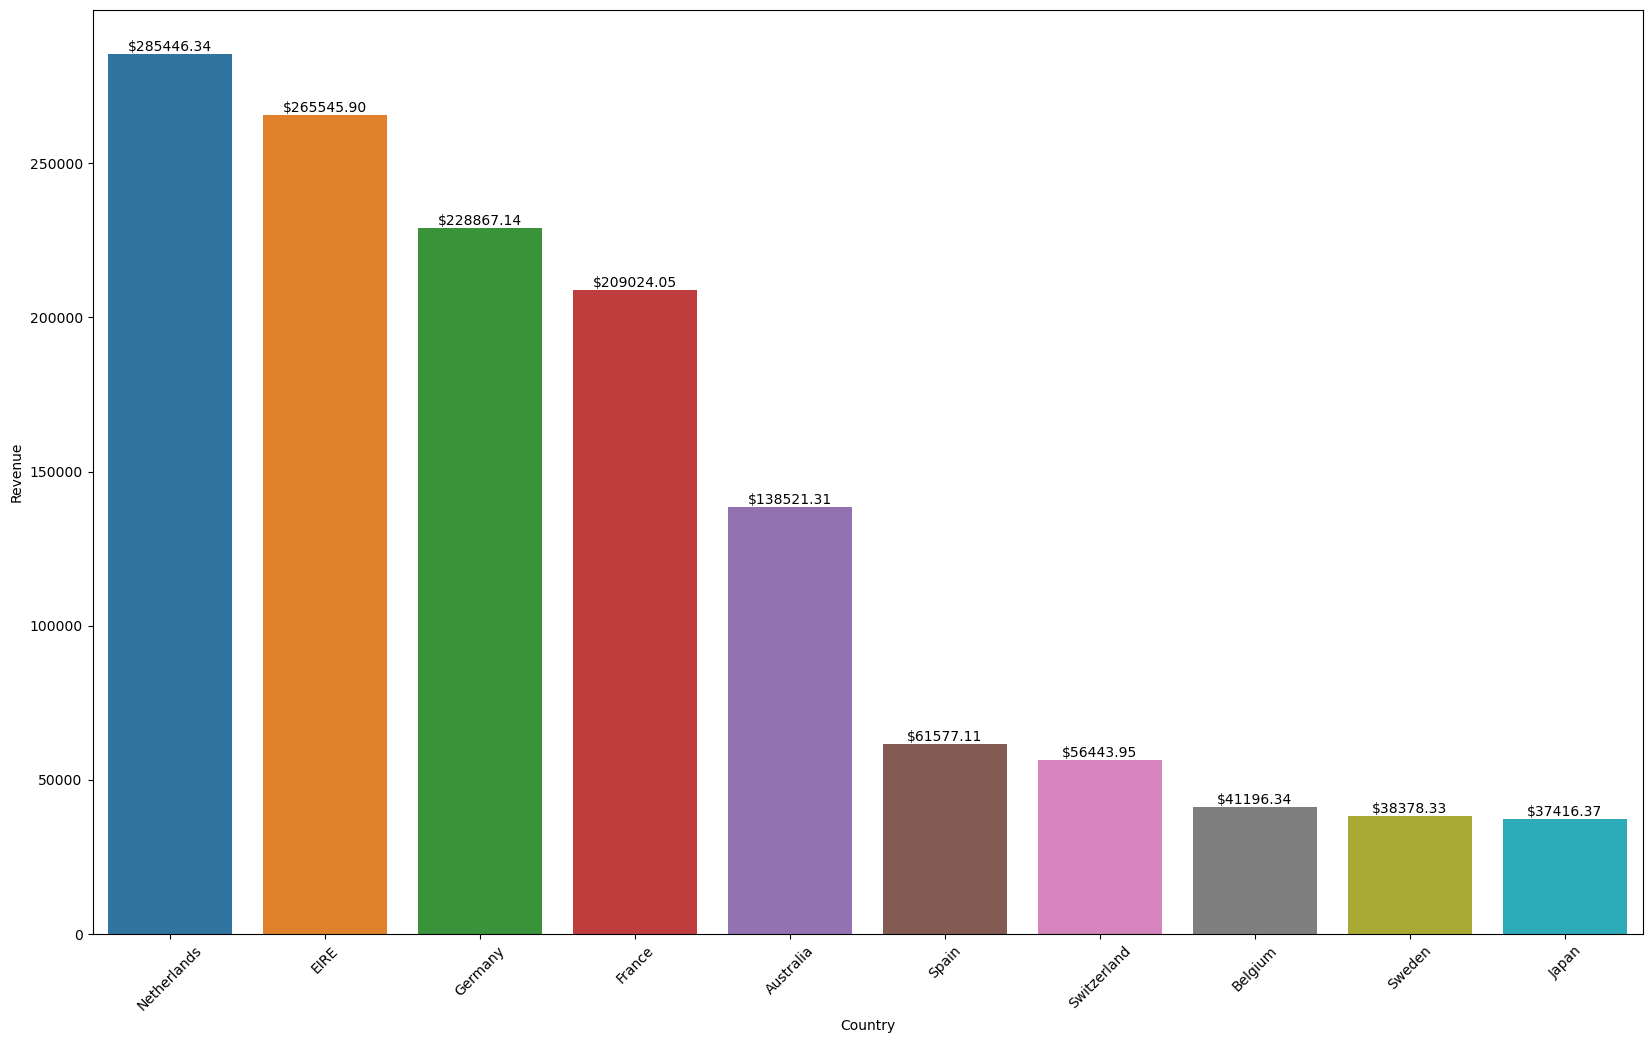

In [17]:
v1 = v0[v0.Country != 'United Kingdom']
plt.subplots(figsize = (20,12))
ax = sns.barplot(v1,x = "Country", y = "Revenue",ci = None, order= v1.sort_values('Revenue',ascending=False).Country.head(10))
ax.bar_label(ax.containers[0],fmt='$%.2f')
plt.xticks(rotation = 45)
plt.show()

## Top 10 Countries generating lowest total revenue

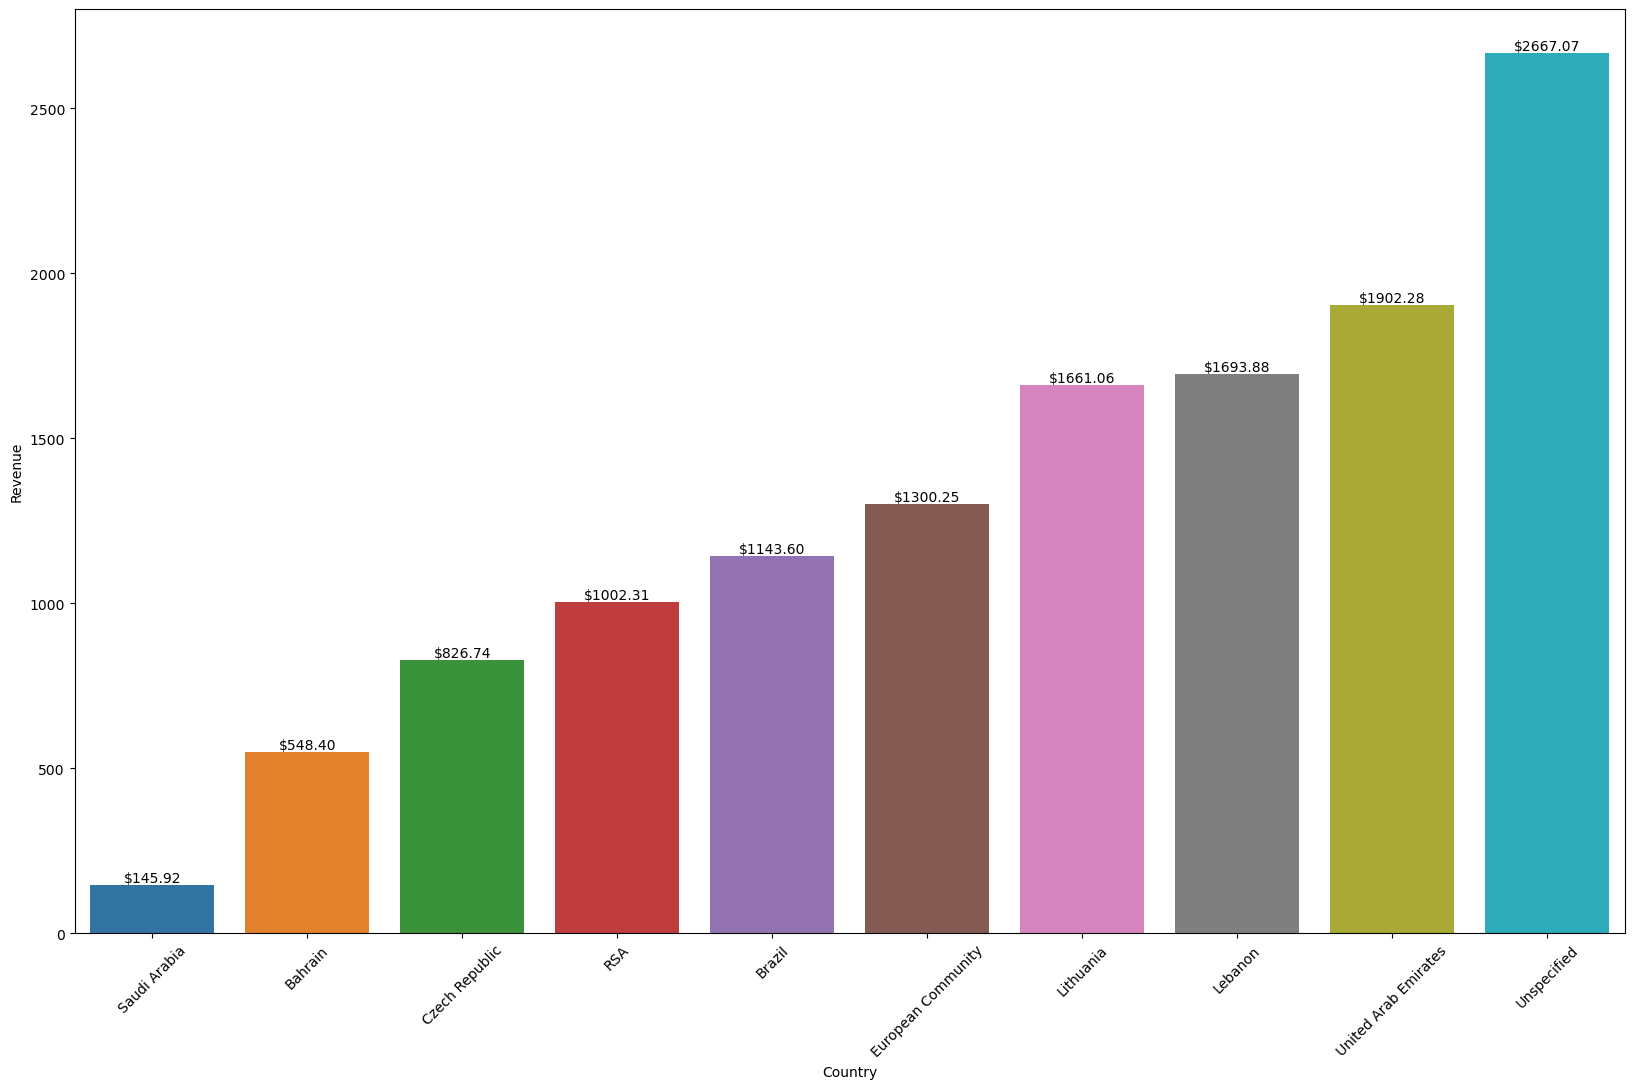

In [18]:
v1 = v0[v0.Country != 'United Kingdom']
plt.subplots(figsize = (20,12))
ax = sns.barplot(v1,x = "Country", y = "Revenue",ci = None, order= v1.sort_values('Revenue').Country.head(10))
ax.bar_label(ax.containers[0],fmt='$%.2f')
plt.xticks(rotation = 45)
plt.show()

In [19]:
v2 = new_data.groupby('CustomerID').sum().reset_index()
v2.head()

,CustomerID,Quantity,UnitPrice,Revenue
0,12346.0,74215,1.04,77183.60
1,12347.0,2458,481.21,4310.00
2,12348.0,2341,178.71,1797.24
3,12349.0,631,605.10,1757.55
4,12350.0,197,65.30,334.40


## Top 10 customers with CustomerID contributing to highest revenue

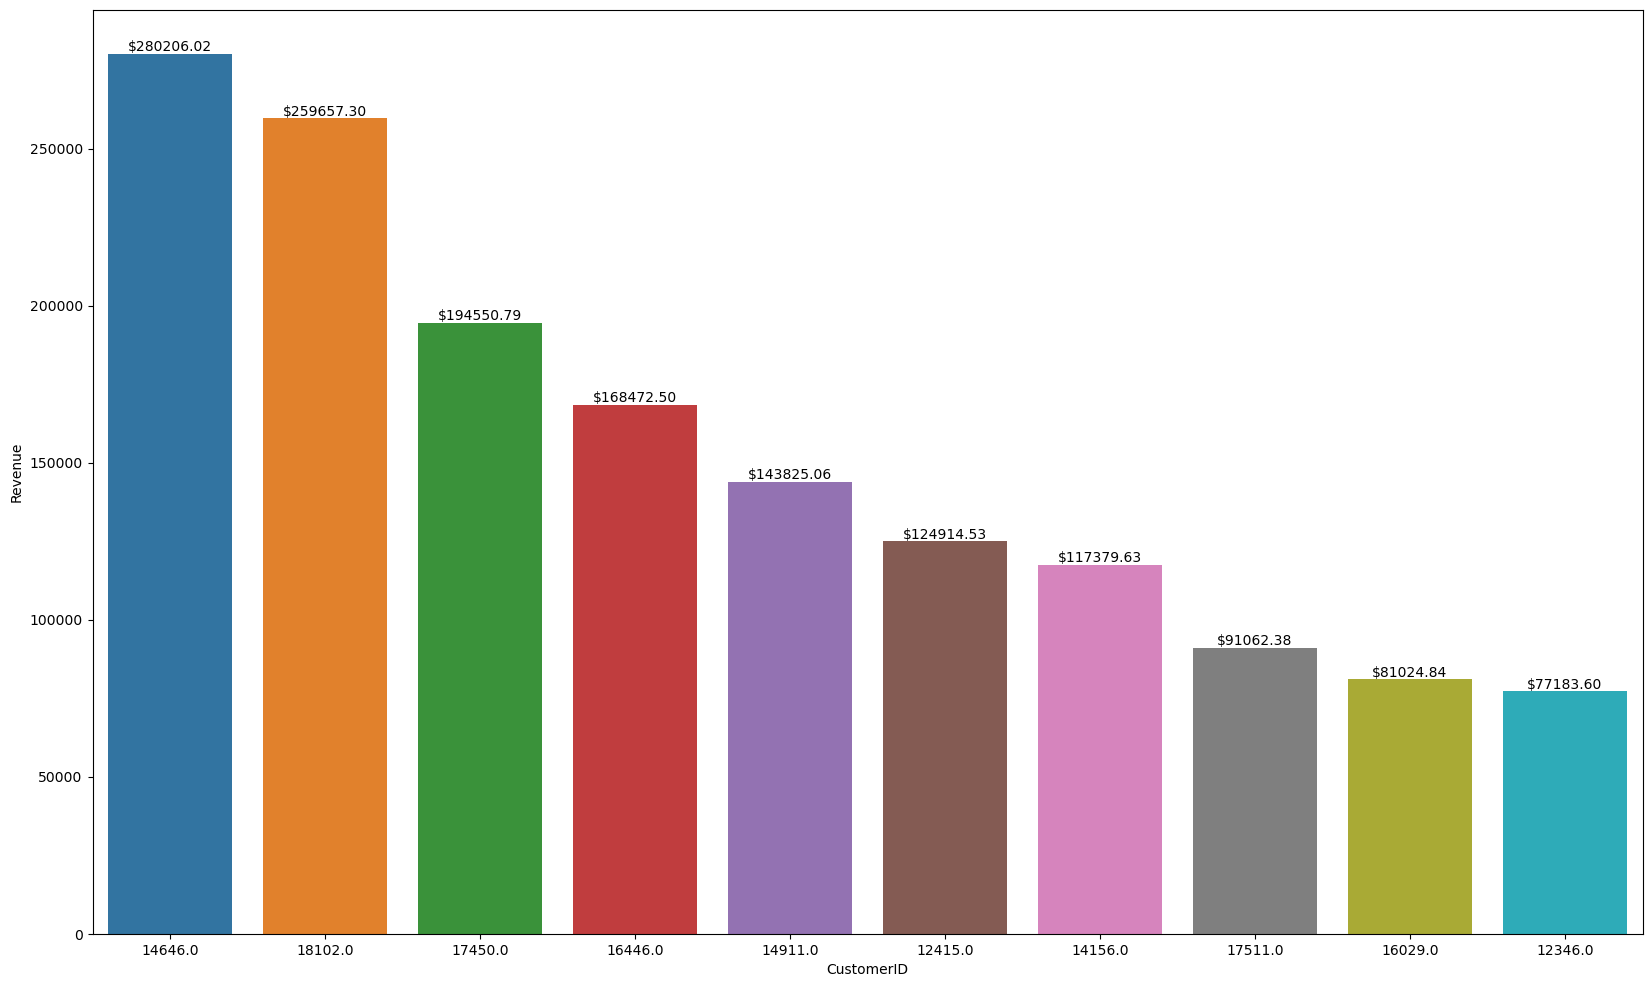

In [20]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v2,x = "CustomerID", y = "Revenue",ci = None, order= v2.sort_values('Revenue',ascending=False).CustomerID.head(10))
ax.bar_label(ax.containers[0],fmt='$%.2f')
plt.show()

In [21]:
v3 = new_data.groupby('Country')['CustomerID'].count().reset_index()
v3.head()

,Country,CustomerID
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


United Kingdom has the highest number of customers – 3,54,345

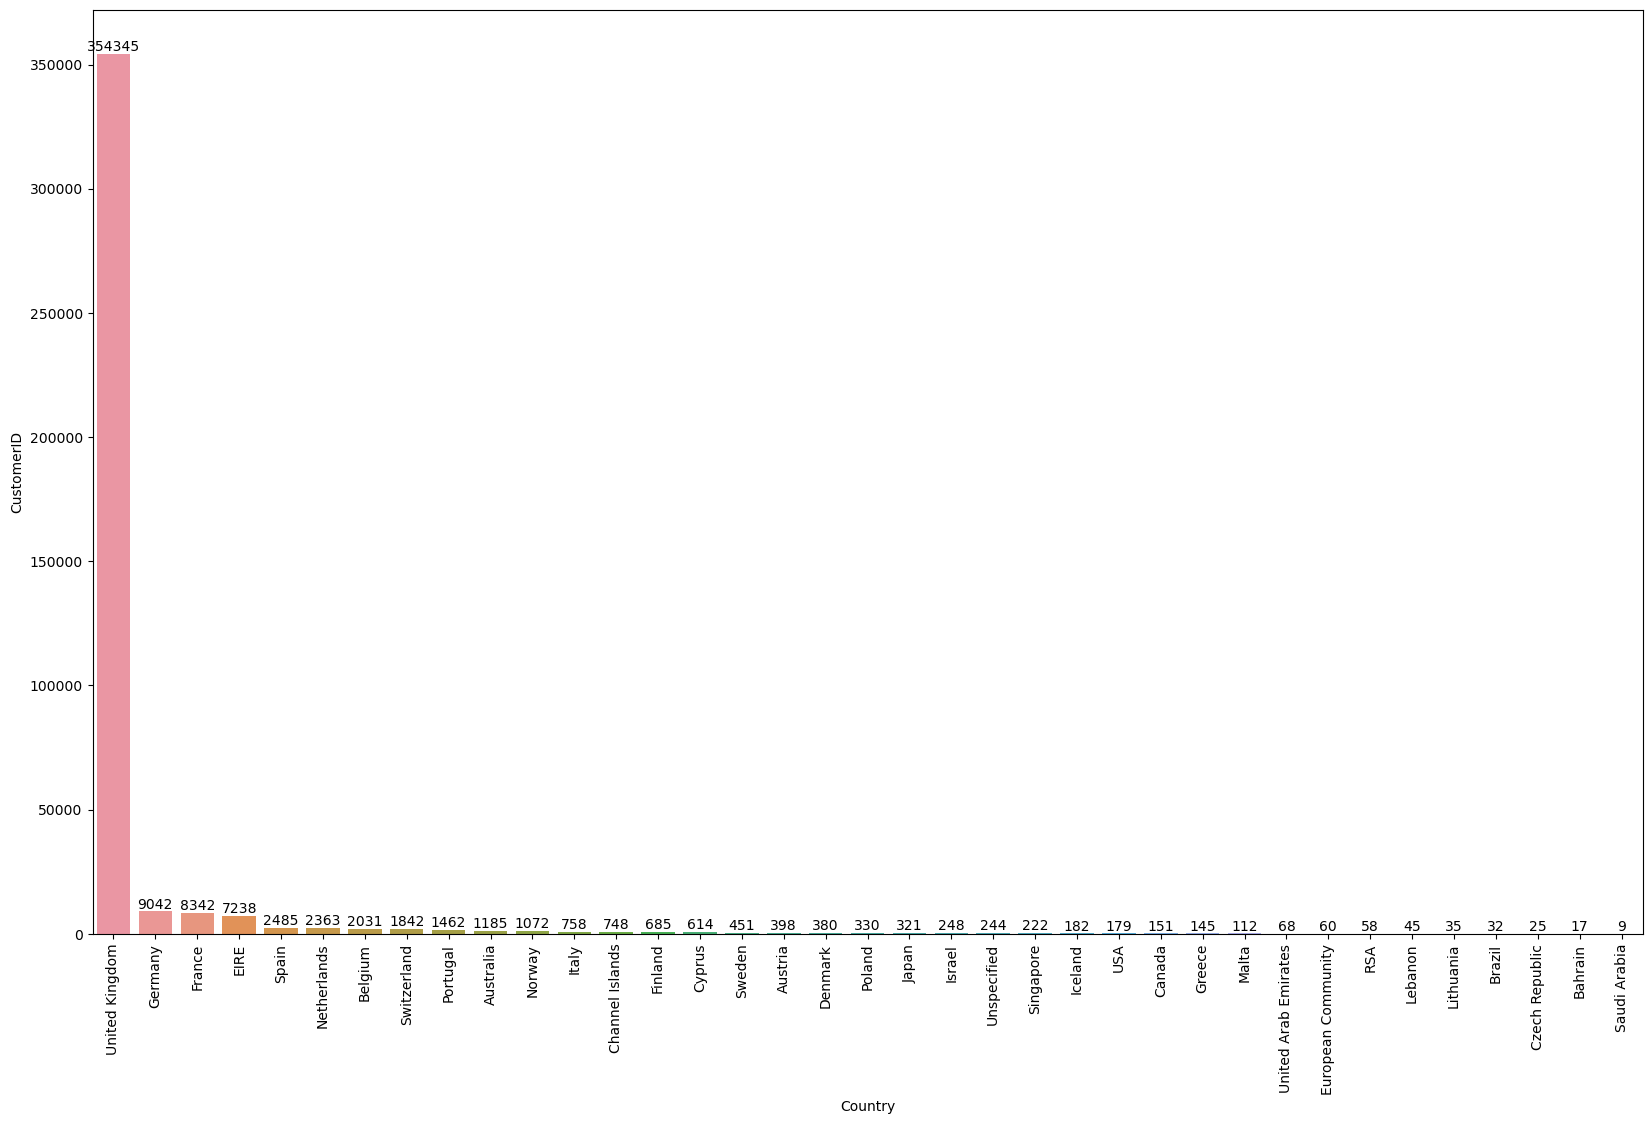

In [22]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v3,x = "Country", y = "CustomerID",ci = None, order= v3.sort_values('CustomerID',ascending=False).Country)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

## Top 10 countries with highest number of customers

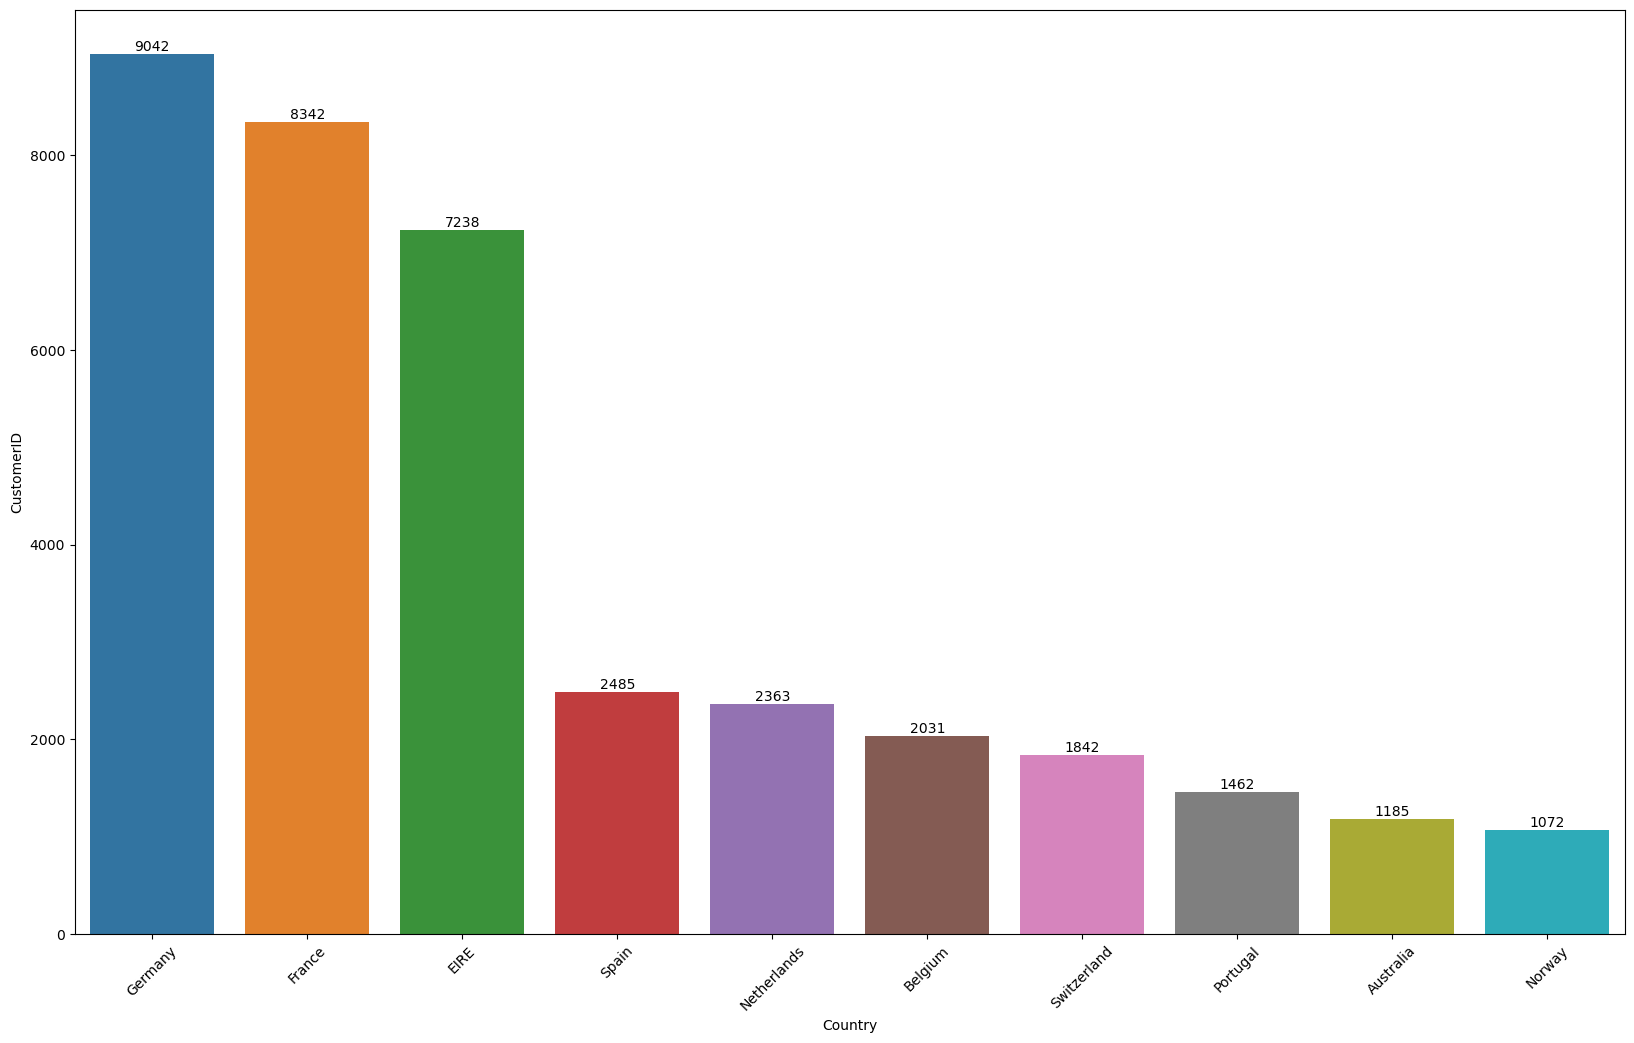

In [23]:
v4 = v3[v3.Country != 'United Kingdom']
plt.subplots(figsize = (20,12))
ax = sns.barplot(v4,x = "Country", y = "CustomerID",ci = None, order= v4.sort_values('CustomerID',ascending=False).Country.head(10))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

## Top 10 countries with lowest number of customers

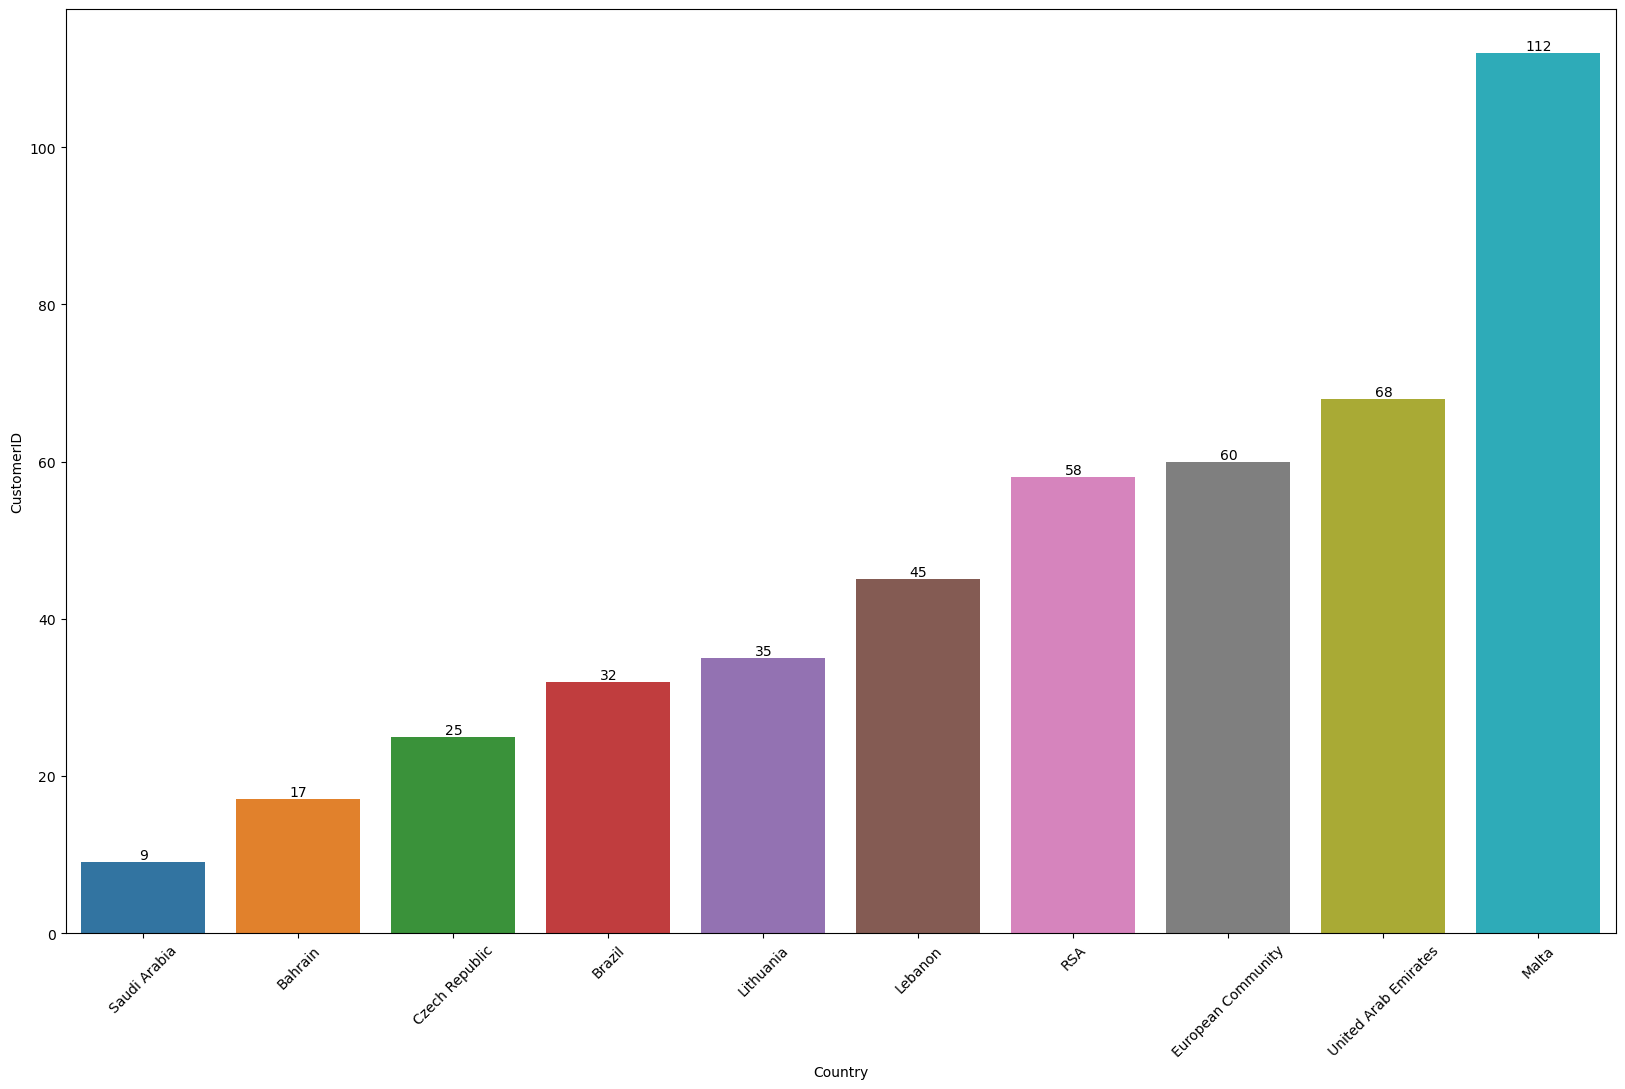

In [24]:
v4 = v3[v3.Country != 'United Kingdom']
plt.subplots(figsize = (20,12))
ax = sns.barplot(v4,x = "Country", y = "CustomerID",ci = None, order= v4.sort_values('CustomerID').Country.head(10))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

In [25]:
v5 = new_data.groupby('Description')['Quantity'].sum().reset_index()
v5.sort_values(by = 'Quantity',ascending=False).head(10)

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


## Top 10 highest selling products

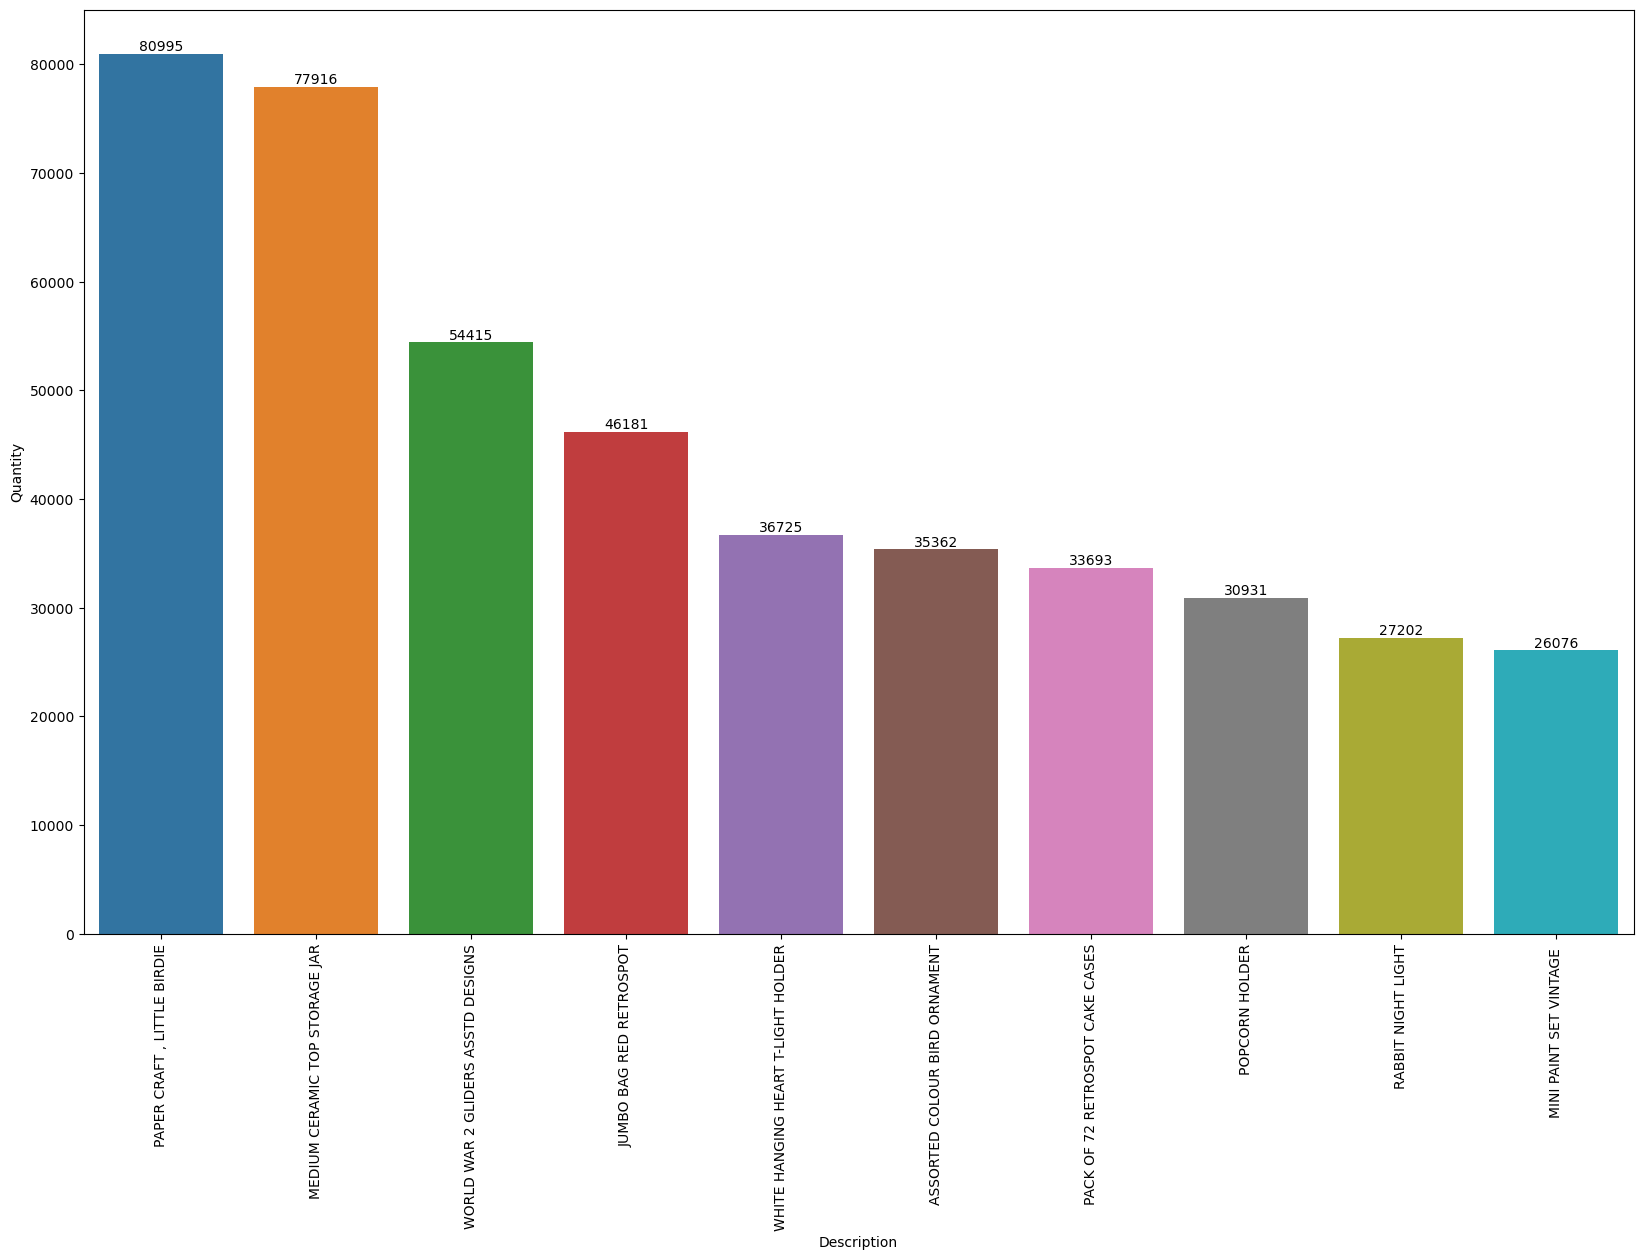

In [26]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v5,x = "Description", y = "Quantity",ci = None, order= v5.sort_values('Quantity',ascending=False).Description.head(10))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

In [27]:
v6 = new_data.groupby(['Country'])['Description'].count().reset_index()
v6.head()

,Country,Description
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


United Kingdom has highest number of selling products 3,54,343 

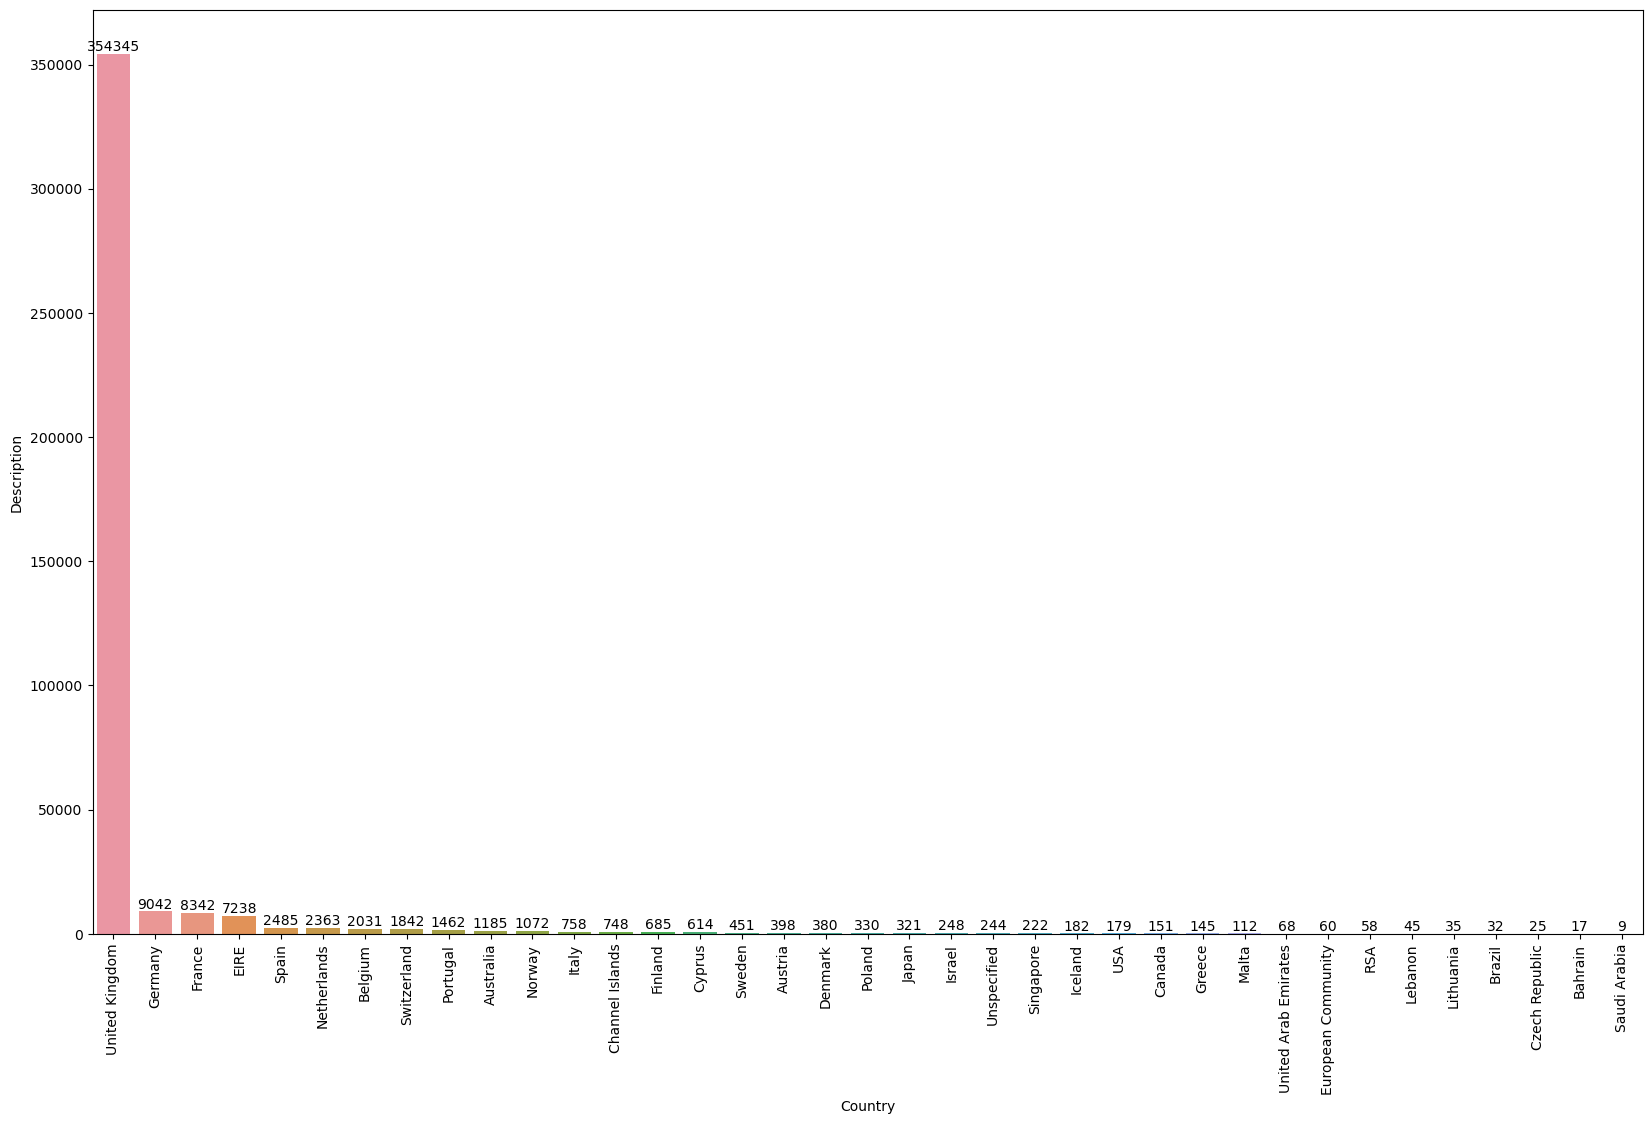

In [28]:
plt.subplots(figsize = (20,12))
ax = sns.barplot(v6,x = "Country", y = "Description",ci = None, order= v6.sort_values('Description',ascending=False).Country)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

## Top 10 countries with highest number of selling products

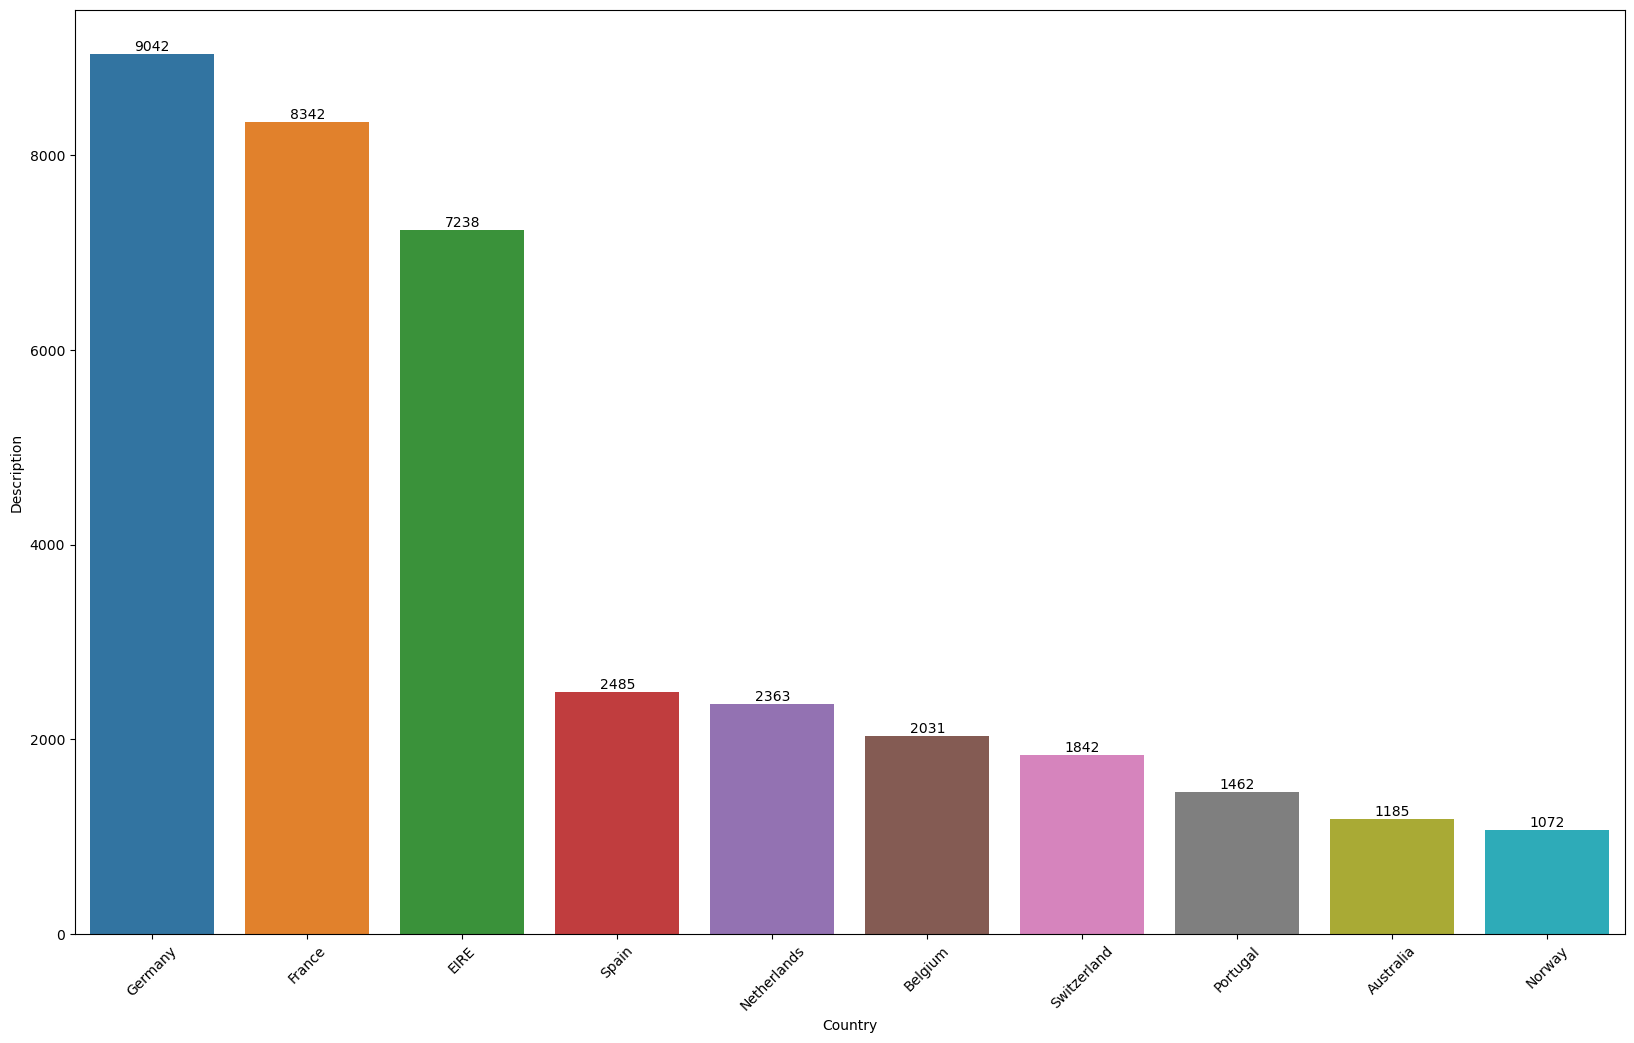

In [29]:
v7 = v6[v6['Country']!= 'United Kingdom']
plt.subplots(figsize = (20,12))
ax = sns.barplot(v7,x = "Country", y = "Description",ci = None, order= v7.sort_values('Description',ascending=False).Country.head(10))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

## Top 5 products in United Kingdom

In [30]:
v7 = new_data.groupby(['Country','Description'])['Description'].count()
v7['United Kingdom'].sort_values(ascending = False).head(5)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1940
JUMBO BAG RED RETROSPOT               1464
REGENCY CAKESTAND 3 TIER              1426
ASSORTED COLOUR BIRD ORNAMENT         1333
PARTY BUNTING                         1308
Name: Description, dtype: int64

## Top 5 products in Germany

In [31]:
v7['Germany'].sort_values(ascending = False).head(5)

Description
POSTAGE                                374
ROUND SNACK BOXES SET OF4 WOODLAND     113
ROUND SNACK BOXES SET OF 4 FRUITS       72
PLASTERS IN TIN WOODLAND ANIMALS        64
REGENCY CAKESTAND 3 TIER                63
Name: Description, dtype: int64

## Top 5 products in France

In [32]:
v7['France'].sort_values(ascending = False).head(5)

Description
POSTAGE                             300
RABBIT NIGHT LIGHT                   73
RED TOADSTOOL LED NIGHT LIGHT        70
PLASTERS IN TIN WOODLAND ANIMALS     68
PLASTERS IN TIN CIRCUS PARADE        66
Name: Description, dtype: int64

## Top 5 products in EIRE

In [33]:
v7['EIRE'].sort_values(ascending = False).head(5)

Description
CARRIAGE                              98
REGENCY CAKESTAND 3 TIER              65
ROSES REGENCY TEACUP AND SAUCER       44
WHITE HANGING HEART T-LIGHT HOLDER    40
VINTAGE SNAP CARDS                    38
Name: Description, dtype: int64

## Top 5 products in Spain

In [34]:
v7['Spain'].sort_values(ascending = False).head(5)

Description
POSTAGE                     62
REGENCY CAKESTAND 3 TIER    22
6 RIBBONS RUSTIC CHARM      15
JAM MAKING SET WITH JARS    14
PLASTERS IN TIN SKULLS      12
Name: Description, dtype: int64

## Top 5 products in Netherlands

In [35]:
v7['Netherlands'].sort_values(ascending = False).head(5)

Description
POSTAGE                                37
SPACEBOY LUNCH BOX                     28
ROUND SNACK BOXES SET OF4 WOODLAND     25
DOLLY GIRL LUNCH BOX                   22
ROUND SNACK BOXES SET OF 4 FRUITS      17
Name: Description, dtype: int64

## Top 5 products in Belgium

In [36]:
v7['Belgium'].sort_values(ascending = False).head(5)

Description
POSTAGE                                96
ROUND SNACK BOXES SET OF4 WOODLAND     38
SPACEBOY LUNCH BOX                     23
DOLLY GIRL LUNCH BOX                   23
ROUND SNACK BOXES SET OF 4 FRUITS      22
Name: Description, dtype: int64

## Top 5 products in Switzerland

In [37]:
v7['Switzerland'].sort_values(ascending = False).head(5)

Description
POSTAGE                                31
PLASTERS IN TIN SPACEBOY               18
ROUND SNACK BOXES SET OF4 WOODLAND     17
PLASTERS IN TIN WOODLAND ANIMALS       16
REGENCY CAKESTAND 3 TIER               12
Name: Description, dtype: int64

## Top 5 products in Portugal

In [38]:
v7['Portugal'].sort_values(ascending = False).head(5)

Description
POSTAGE                             30
RETROSPOT TEA SET CERAMIC 11 PC     14
LUNCH BAG RED RETROSPOT             14
LUNCH BAG CARS BLUE                 12
BAKING SET 9 PIECE RETROSPOT        12
Name: Description, dtype: int64

## Top 5 products in Australia

In [39]:
v7['Australia'].sort_values(ascending = False).head(5)

Description
RED TOADSTOOL LED NIGHT LIGHT        9
SET OF 3 CAKE TINS PANTRY DESIGN     9
ROSES REGENCY TEACUP AND SAUCER      8
LUNCH BAG SPACEBOY DESIGN            8
PARTY BUNTING                        8
Name: Description, dtype: int64

## Top 5 products in Norway

In [40]:
v7['Norway'].sort_values(ascending = False).head(5)

Description
POSTAGE                                20
SET OF 3 CAKE TINS PANTRY DESIGN       13
REGENCY CAKESTAND 3 TIER               10
CHILDS BREAKFAST SET DOLLY GIRL         8
SET OF TEA COFFEE SUGAR TINS PANTRY     7
Name: Description, dtype: int64

In [41]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [42]:
time_data = new_data.copy("deep")

In [43]:
time_data['InvoiceDate'] = pd.to_datetime(time_data['InvoiceDate'])

In [44]:
time_data['Year'] = time_data['InvoiceDate'].dt.year
time_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [45]:
t0 = time_data.groupby('Year')['Revenue'].sum().reset_index()
t0

,Year,Revenue
0,2010,572713.890
1,2011,8338694.014


## Comparing revenue yearwise

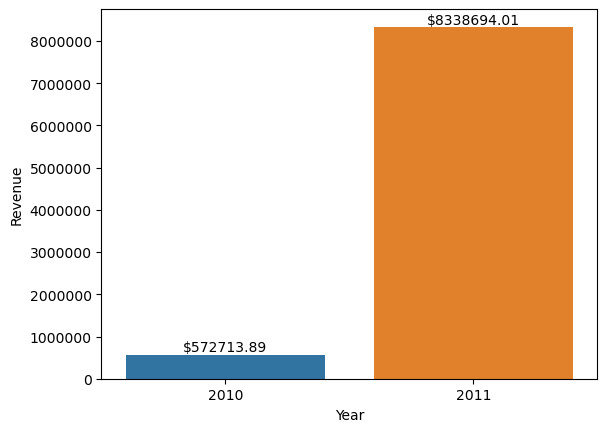

In [46]:
ax = sns.barplot(t0,x = "Year", y = "Revenue",ci = None)
ax.bar_label(ax.containers[0],fmt='$%.2f')
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

In [47]:
t1 = time_data[time_data['Year']==2011]
t1['MonthName'] = t1['InvoiceDate'].dt.month_name()
t1['month'] = t1['InvoiceDate'].dt.month
t2 = t1.groupby(['MonthName','month'])['Revenue'].sum().reset_index().sort_values(by='month')
t2 = t2.drop(columns='month')
t2

,MonthName,Revenue
4,January,569445.040
3,February,447137.350
7,March,595500.760
0,April,469200.361
8,May,678594.560
6,June,661213.690
5,July,600091.011
1,August,645343.900
11,September,952838.382
10,October,1039318.790


## Visualizing the trend of monthly revenue of the year 2011

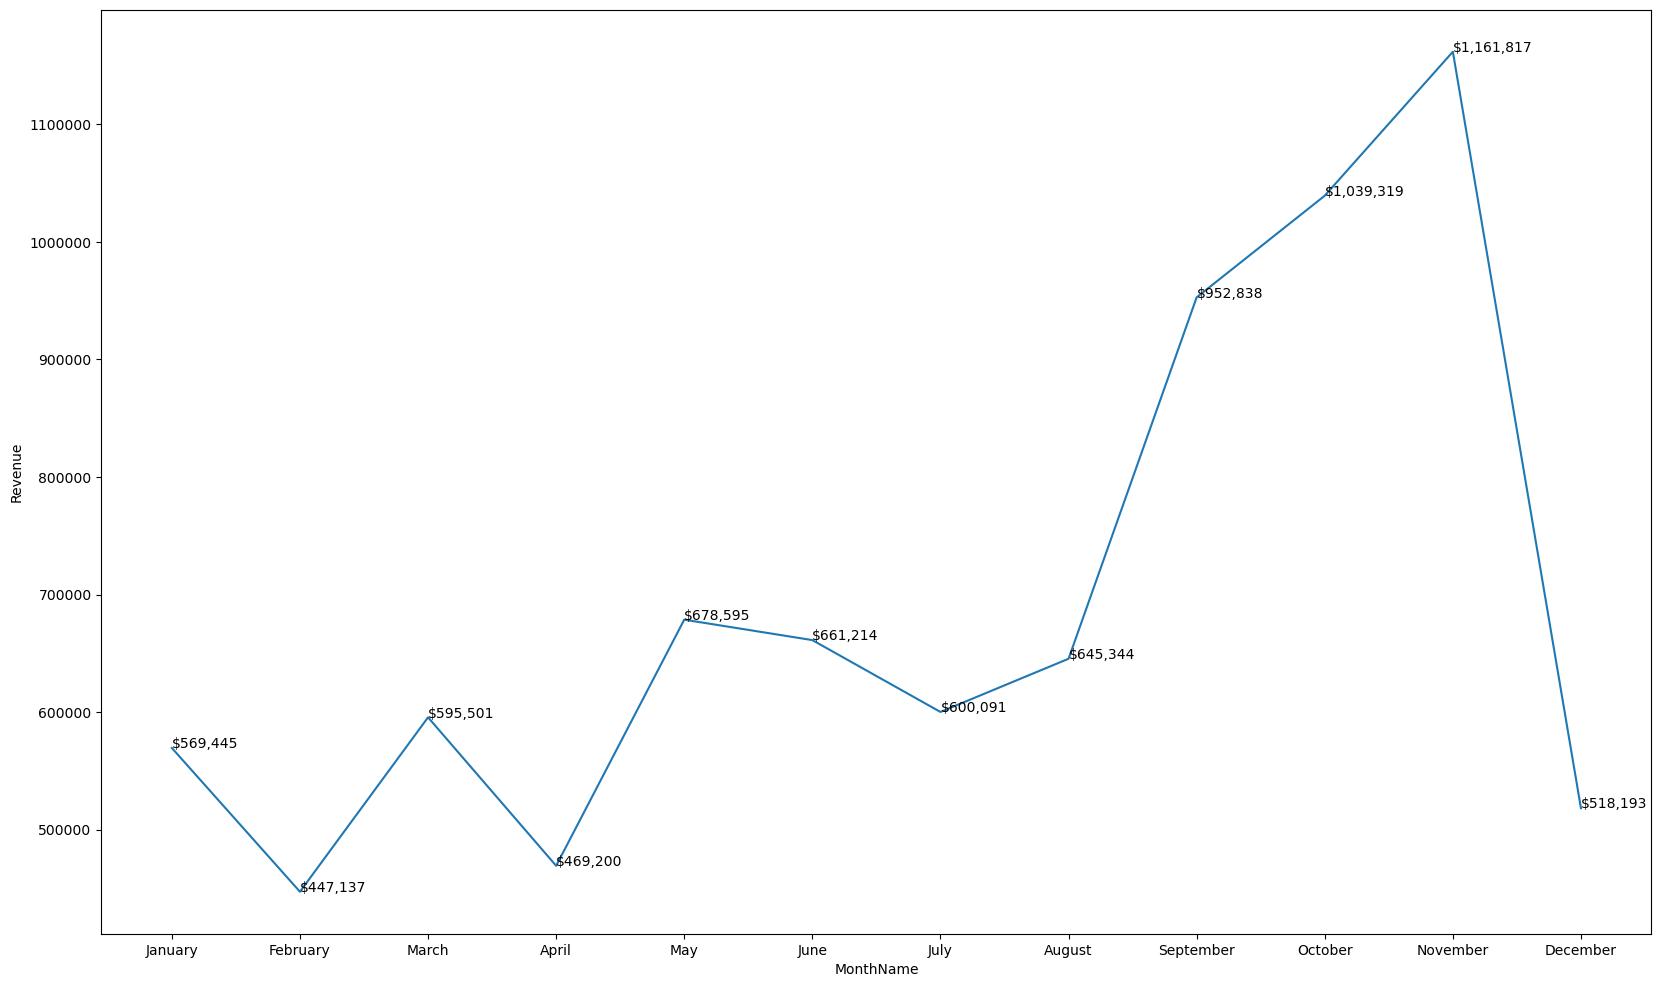

In [48]:
plt.subplots(figsize = (20,12))
ax = sns.lineplot(t2,x = "MonthName", y = "Revenue")
for x,y in zip(t2['MonthName'],t2['Revenue']):
    plt.text(x = x, y = y, s = '${:,.0f}'.format(y))
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.show()

## RMF strategy

As we can see from the original data, that there are no such features on which basis the customers could be segmented. RMF strategy is used in such cases where revenue is the major outcome and where the company is more focused towards revenue and customers.

Three groupings are created:
1.	Monetary:  Grouping CustomerID and Total Revenue per customer
2.	Frequency: Grouping CustomerID and total number of Invoices per customer
3.	Recency: Grouping the difference of current date and Invoice Date of invoices per customer in days, and the CustomerID


In [49]:
monetary = v2[['CustomerID','Revenue']]
monetary.head()

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [50]:
frequency = time_data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [51]:
Lastdate = max(time_data.InvoiceDate) 
Lastdate = Lastdate + pd.DateOffset(days=1)
time_data['Diff'] = Lastdate - time_data['InvoiceDate']
recency = time_data.groupby('CustomerID')['Diff'].min().reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [52]:
rmf = recency.merge(monetary,on='CustomerID')
rmf = rmf.merge(frequency,on="CustomerID")
rmf.columns = ['CustomerID','Recency','Monetary','Frequency']
rmf = rmf.drop('CustomerID',axis = 1)
rmf.Recency = rmf.Recency.dt.days
rmf.head()

,Recency,Monetary,Frequency
0,326,77183.60,1
1,2,4310.00,182
2,75,1797.24,31
3,19,1757.55,73
4,310,334.40,17


In [53]:
pip install pyclustertend 

Note: you may need to restart the kernel to use updated packages.


## Hopkins Score

In [54]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [55]:
hopkins(scale(rmf),rmf.shape[0])

0.009215112478576034

Hopkins score is calculated to know whether the data is clusterable. In this case, Hopkins score is tending towards zero,which shows that this dataset is highly clusterable.

## Calculating elbow

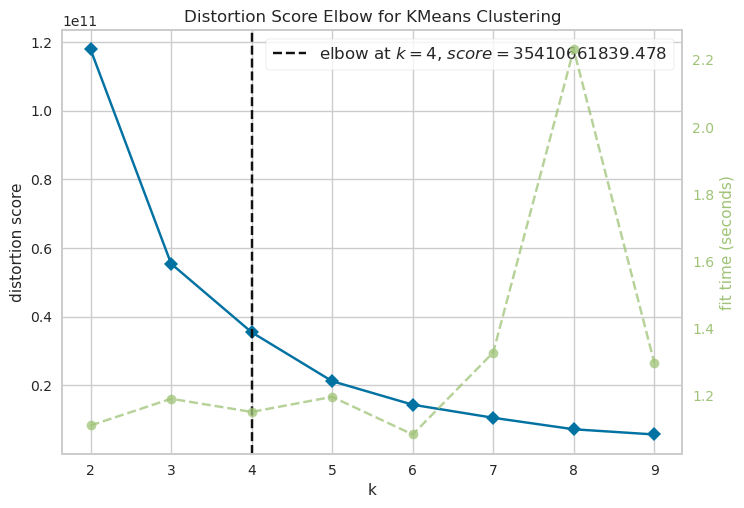

In [56]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k =(2,10))
visualizer.fit(rmf)
visualizer.show()
plt.show()

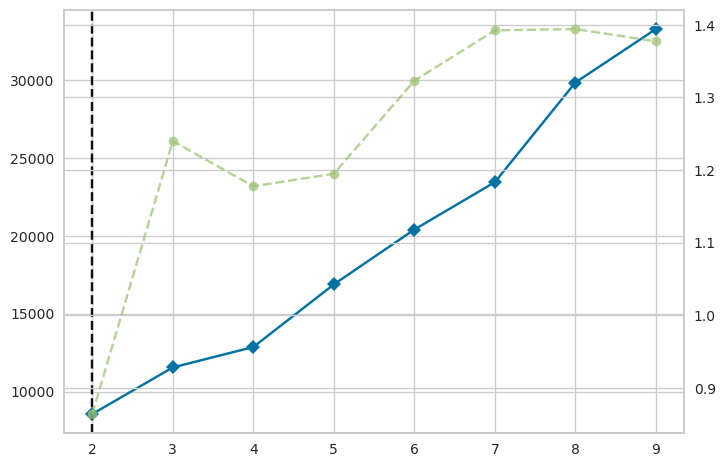

In [57]:
visualizer2 = KElbowVisualizer(model ,k=(2,10), metric='calinski_harabasz', timings = True,locate_elbow = True)
visualizer2.fit(rmf)
visualizer.show()
plt.show()

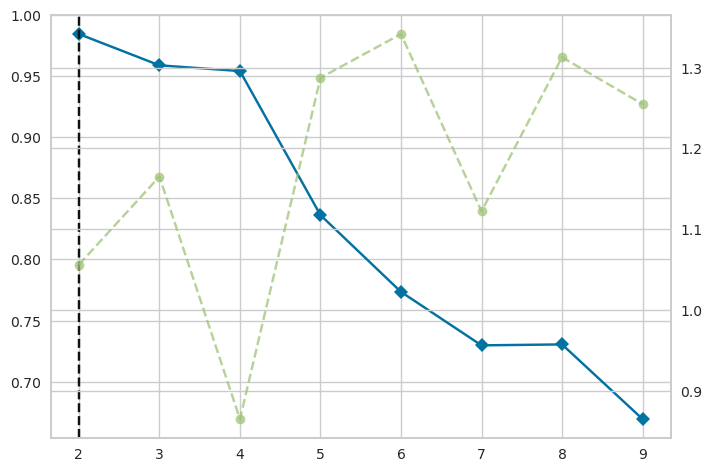

In [58]:
visualizer3 = KElbowVisualizer(model ,k=(2,10), metric='silhouette', timings = True,locate_elbow = True)
visualizer3.fit(rmf)
visualizer.show()
plt.show()

Using distortion score in KElbowVisualizer of Yellowbrick library, elbow is at k = 4, while using Calinski – Harabasz Score and Silhouette as the metrics in KElbowVisualizer, elbow is at k = 2. So, we have chosen number of clusters as 2.

## Fitting the Model

In [59]:
kmeans = KMeans(n_clusters = 2,random_state = 24, max_iter = 1000)
y_means = kmeans.fit_predict(rmf)

## Silhouette Score

In [60]:
from sklearn import metrics
metrics.silhouette_score(rmf,y_means)

0.9844437972674112

Silhouette Score is 0.9844, which is a very good score for this clustering model.

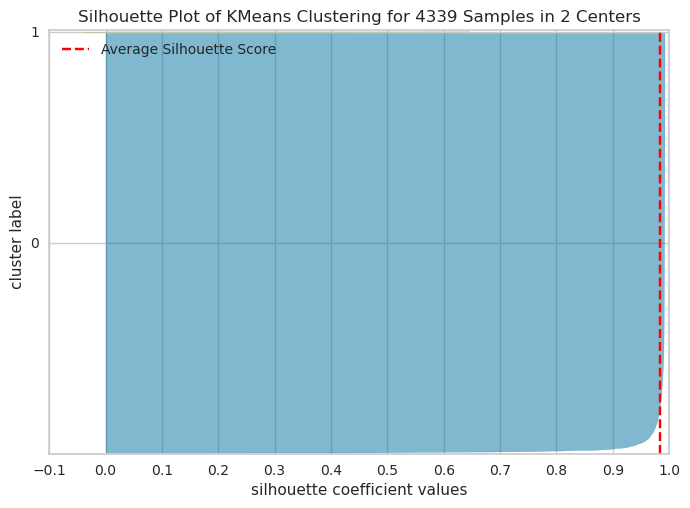

In [61]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer4 = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer4.fit(rmf)
visualizer4.show()
plt.show()

## Davies Bouldin Score

In [62]:
metrics.davies_bouldin_score(rmf,y_means)

0.3282896755462273

Davies – Bouldin Score is 0.328, which also evaluates the model as a good one.



## Inter Cluster Distance Map

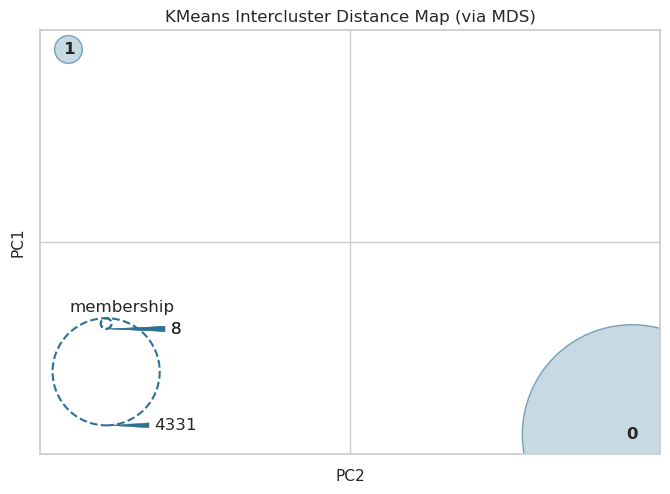

In [63]:
from yellowbrick.cluster import InterclusterDistance
visualizer4 = InterclusterDistance(kmeans)
visualizer4.fit(rmf)
visualizer4.show()
plt.show()

By visualizing the inter cluster distance map, the membership of first cluster group and second cluster group are 4331 and 8 respectively within 4339 samples.

In [64]:
rmf['Label'] = y_means
rmf.head()

,Recency,Monetary,Frequency,Label
0,326,77183.60,1,0
1,2,4310.00,182,0
2,75,1797.24,31,0
3,19,1757.55,73,0
4,310,334.40,17,0


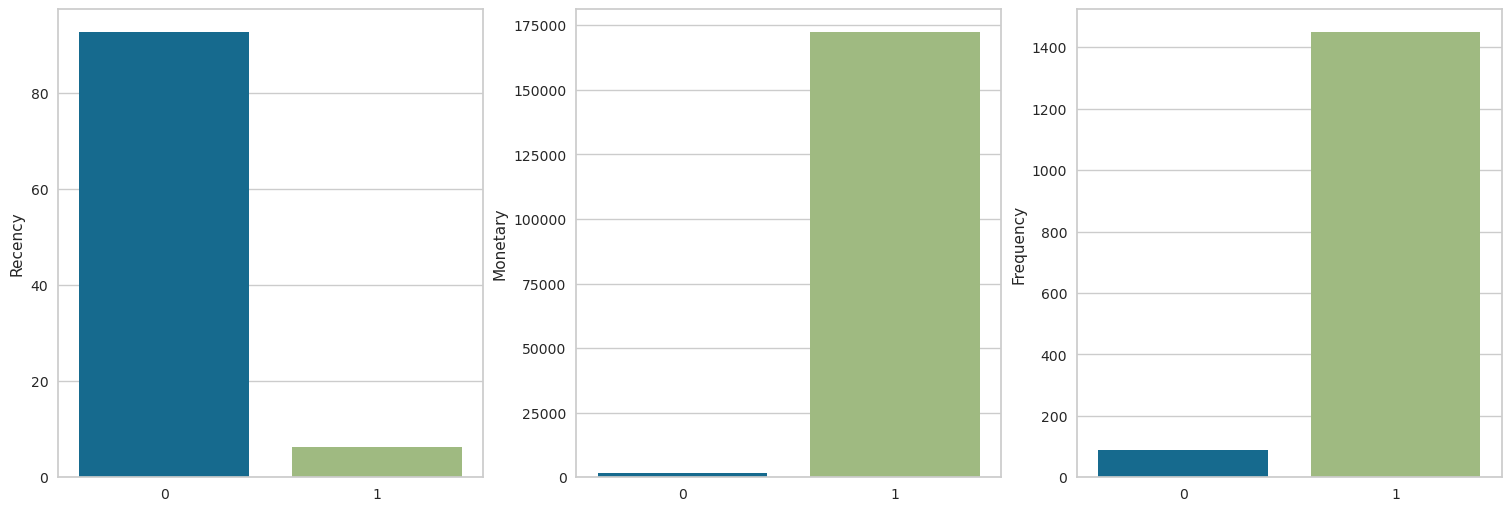

In [65]:
fig,axes = plt.subplots(1,3,figsize=(15,5),constrained_layout = True)
sns.barplot(x = [0,1],y = rmf.groupby('Label')['Recency'].mean(), ax = axes[0])
sns.barplot(x = [0,1],y = rmf.groupby('Label')['Monetary'].mean(),ax = axes[1])
sns.barplot(x = [0,1],y = rmf.groupby('Label')['Frequency'].mean(),ax= axes[2])
plt.show()

Grouping the label and each feature with mean, the clusters are classified into two groups:
1.	High Monetary – High Frequency – Low Recency
2.	Low Monetary – Low Frequency – High Recency


## Conclusion

The Customers are clustered into two groups:
1.	Cluster 1:  Frequent and high revenue generating customers.
2.	Cluster 2: Past customers who have not bought company’s products from a long time.

The number of customers in Cluster 1 are high, it means that the company is performing good, and it can focus on this cluster to improve its relationship with its customers to gain more revenue.

The customers of United Kingdom are highly impressed with the company’s product.
